# 4 Player Game Strategy Analyser



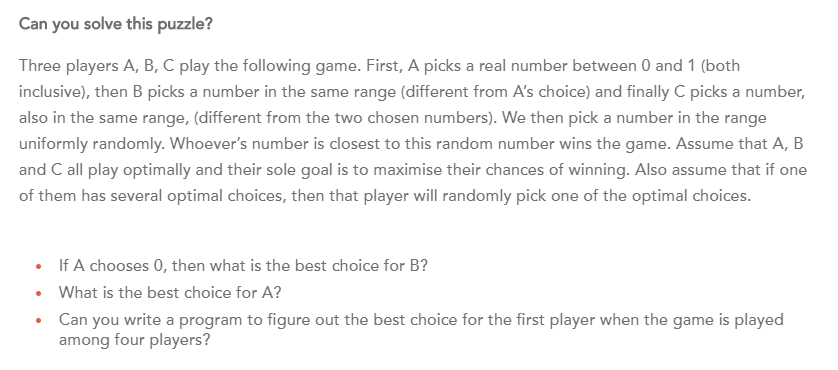
    

I am using a brute force approach with a precision parameter.
The decision making of 4th Player binds everyone.

Although other players don't know about the 4th player's pick, they know that 4th Player will only act to maximize its prediction range.

The Player A,B,C should act in such a way that they both try to minimize 4th Player's maximum prediction range and maximize their ranges. 

Third player will look at what is decided by previous players and will try to minimize the maximum prediction range of 4th player. This will maximize its range as well.

Second Player knows that Third player will act in the way described above,so it has to pick such a number that Third player cannot decrease the prediction range and end up with more prediction range.

This applies for third player as well. First player has a lot of calculation to do.



### Answers

In [386]:
import numpy as np
from IPython.display import clear_output


#### 1st Solution

In [535]:
solve_puzzle_a(3)

Player A Picked
0
Player A Probability of Winning


IndexError: index 0 is out of bounds for axis 0 with size 0

#### 2nd and 3rd Solution

In [530]:
#Utility Functions

# THis function returns the estimation range for the added parameter, given we have an array of player selections. Array includes 
# upper boundary(1) and lower boundary(0) as well. Range value means the probabilty of winning.
def find_range(array,added):
    Init_Array=np.sort(np.append(array,added))
    Init_Array_=list(Init_Array)
    if added == 0:
        added_loc=len(Init_Array_) - 1 - Init_Array_[::-1].index(added)
    else:
        added_loc=Init_Array_.index(added)
    Init_Array=Init_Array[1:-1]
    i=added_loc-1
    loc_d=i-1
    loc_u=i+1
    if loc_d < 0:
        down=0
    else :
        down=(Init_Array[i]+Init_Array[i-1])/2
    if loc_u>len(Init_Array)-1:
        up=1
    else:
        up=(Init_Array[i]+Init_Array[i+1])/2
    range_=(up-down)
    return range_

# this function returns the range value of each player's selection. array includes upper and lower boundary and selections.
def find_ranges(array):
    result=[]
    array_a=np.delete(array,0)
    array_a=np.delete(array_a,0)

    for i in range(len(array_a)):
        val=array_a[i]
        array_n=np.delete(array_a,i)
        array_n=np.append(array_n,1)
        array_n=np.append(array_n,0)
        s=find_range(array_n,val)
        result=np.append(result,s)
    return result

# this function evaluates the final possible paths and returns the one with descending order. 
def rank_max(array):
    probs=array[:,1]
    select=array[:,0]
    truth=np.where((np.all(np.diff(probs)<0,axis=1))==True)
    final_array=probs[truth]
    final_select=select[truth]

    for i in range(len(final_array[0])):
        Player = 'Player '+chr(65+i)+' Picked'
        Picked=final_select[0][i]
        Player_range = 'Player '+chr(65+i)+' Probability of Winning'
        Prob=final_array[0][i]
        print(Player)
        print(Picked)
        print(Player_range)
        print(Prob)

# this function evaluates the final possible paths and returns the one with descending order. Only for first question
def rank_max_a(array):
    
    probs=array[:,1]
    probs_m=array[:,1]
    select=array[:,0]
    probs=probs[:,1:]
    select=select[:,1:]

    truth=np.where((np.all(np.diff(probs)<0,axis=1))==True)
    t_list=[]
    comp_list=[]
    if (len(truth[0]))>1:
        for i in range(len(truth[0])):
            comp=probs[truth[0][i]][1]
            t_list.append(comp)
            comp_loc=truth[0][i]
            comp_list.append(comp_loc)
    
        truth=np.array((comp_list[t_list.index(max(t_list))]))
    
        final_array=probs[truth]
        final_select=select[truth]

        print('Player A Picked')
        print('0')
        print('Player A Probability of Winning')
        print(probs_m[truth][0])
        for i in range(len(final_array)):
            Player = 'Player '+chr(65+i+1)+' Picked'
            Picked=final_select[i]
            Player_range = 'Player '+chr(65+i+1)+' Probability of Winning'
            Prob=final_array[i]
            print(Player)
            print(Picked)
            print(Player_range)
            print(Prob)
    else:
        final_array=probs[truth]
        final_select=select[truth]
        print('Player A Picked')
        print('0')
        print('Player A Probability of Winning')
        print(probs_m[truth][0][0])
        for i in range(len(final_array[0])):
            Player = 'Player '+chr(65+i+1)+' Picked'
            Picked=final_select[0][i]
            Player_range = 'Player '+chr(65+i+1)+' Probability of Winning'
            Prob=final_array[0][i]
            print(Player)
            print(Picked)
            print(Player_range)
            print(Prob)




In [388]:
## Function to solve the puzzle

def solve_puzzle(precision):
    iterate=24
    F_S_List=[]
    F_M_num=[]
    Global_List=[]
    #Player A's Decision Making
    for l in range(0,iterate+1):
        rand_clear=np.random.randint(0,5)
        if rand_clear==3:
            clear_output()
        f=l/iterate
        text="{0:.0f}%".format(f*100)
        print(text+' completed')
        z=(np.array([0,1]))
        a1=np.append(z,f)
        #Player B's Decision Making
        for s in range(0,iterate+1):
            d=s/iterate
            if d == f:
                continue
            a2=np.append(a1,d)
            F_num_L=[]
            F_Max_L=[]

            # Player C's Decision Making
            for k in range(0,iterate+1):
                g=k/iterate
                if g==d or g==f:
                    continue
                a3=np.append(a2,g)
                F_M_List=[]
                F_M_num=[]
                # Player D's decision making
                for t in range(0,iterate*precision+1):
                    h=t/(iterate*precision)
                    if h==g or h==d or h==f:
                        continue
                    F_M=find_range(a3,h)
                    Final_list=np.append(a3,h)
                    F_M_List.append([F_M,Final_list])              
                # Player C figures out the maximum attainable range for Player D 
                max_list=[]
                for i in range(len(F_M_List)):
                    val=F_M_List[i][0]
                    max_list.append(val)
                F_Max=max(max_list)
                F_num=F_M_List[max_list.index(F_Max)][1]
                F_num_L.append(F_num)
                F_Max_L.append(F_Max)
            # Player B figures out the maximum atainable range for Player D and possible actions of Player C
            F_Min=min(F_Max_L)
            Selections=F_num_L[F_Max_L.index(F_Min)]
            Item=[Selections,F_Min]
            Global_List.append(Item)
    clear_output()
    #Player A evaulates the consequences of his/her selection
    Final_Range=[]
    for i in range(len(Global_List)):
        val=Global_List[i][1]
        Final_Range.append(val)

    list_1 = [item for item in Global_List if item[1]==min(Final_Range)]
    item_list=[]
    for i in range(len(list_1)):
        selects_all=list_1[i][0]
        selections=(list_1[i][0][2:])
        probs=find_ranges(selects_all)
        item=[selections,probs]
        item_list.append(item)
    item_list=np.array(item_list)
    rank_max(item_list)

In [455]:
def solve_puzzle_a(precision):
    iterate=24
    F_S_List=[]
    F_M_num=[]
    Global_List=[]
    #Player A's Decision Making  
    z=(np.array([0,1]))
    a1=np.append(z,0)
    #Player B's Decision Making
    for s in range(0,iterate+1):
        d=s/iterate
        rand_clear=np.random.randint(0,5)
        if rand_clear==3:
            clear_output()
        text="{0:.0f}%".format(d*100)
        print(text+' completed')
        if d == f:
            continue
        a2=np.append(a1,d)
        F_num_L=[]
        F_Max_L=[]

        # Player C's Decision Making
        for k in range(0,iterate+1):
            g=k/iterate
            if g==d or g==f:
                continue
            a3=np.append(a2,g)
            F_M_List=[]
            F_M_num=[]
            # Player D's decision making
            for t in range(0,iterate*precision+1):
                h=t/(iterate*precision)
                if h==g or h==d or h==f:
                    continue
                F_M=find_range(a3,h)
                Final_list=np.append(a3,h)
                F_M_List.append([F_M,Final_list])              
            # Player C figures out the maximum attainable range for Player D 
            max_list=[]
            for i in range(len(F_M_List)):
                val=F_M_List[i][0]
                max_list.append(val)
            F_Max=max(max_list)
            F_num=F_M_List[max_list.index(F_Max)][1]
            F_num_L.append(F_num)
            F_Max_L.append(F_Max)
        # Player B figures out the maximum atainable range for Player D and possible actions of Player C
        F_Min=min(F_Max_L)
        Selections=F_num_L[F_Max_L.index(F_Min)]
        Item=[Selections,F_Min]
        Global_List.append(Item)
    clear_output()
    #Player A evaulates the consequences of his/her selection
    Final_Range=[]
    for i in range(len(Global_List)):
        val=Global_List[i][1]
        Final_Range.append(val)

    list_1 = [item for item in Global_List if item[1]==min(Final_Range)]
    item_list=[]
    for i in range(len(list_1)):
        selects_all=list_1[i][0]
        selections=(list_1[i][0][2:])
        probs=find_ranges(selects_all)
        item=[selections,probs]
        item_list.append(item)
    item_list=np.array(item_list)
    rank_max_a(item_list)